In [1]:
#Upload the .txt or .csv format of the Twitter scrapes for Mozdeh
import csv
import numpy as np
import scipy.io 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import autocorrelation_plot, lag_plot

dataframe_raw = pd.read_csv('raw data/antifa/ANTIFA_Tweets_AllFiltered.txt', sep='\t', lineterminator='\n')

dataframe_sent = pd.read_csv('raw data/antifa/ANTIFA_sentiment.txt', sep='\t', lineterminator='\n')


In [2]:
dataframe_raw.head() #Just a short view of what we are working with

,Label,EntryID,Published,Tweet(Title),Content(Blank),Geo,Source,AuthorName,AuthorURL,Language,Retweets,Timezone,FavoriteCount,UserFollowersCount,UserStatusesCount
0,antifa,897500805950865408,Tue Aug 15 16:50:41 +0000 2017,RT @JackPosobiec: Journalist Accused Of ‘Looki...,RT @JackPosobiec: Journalist Accused Of ‘Looki...,null,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Linda P,USAHellfire,en,83,Central Time (US & Canada),8370,2924,173515.0
1,antifa,897500804839374720,Tue Aug 15 16:50:41 +0000 2017,RT @S_Cooper0404: 💥POLL💥 If the #Soros dollars...,RT @S_Cooper0404: 💥POLL💥 If the #Soros dollars...,null,"<a href=""http://twitter.com/download/android"" ...",DEPLORABLE MELANIE,CodeBlueNTexas,en,12,null,27179,4073,66663.0
2,antifa,897500804122202112,Tue Aug 15 16:50:41 +0000 2017,RT @JaydaBF: VIDEO: Antifa Burn The American F...,RT @JaydaBF: VIDEO: Antifa Burn The American F...,null,"<a href=""http://twitter.com/download/android"" ...",SzymonOwczarzy 🇵🇱✝,szymonowczarzy,en,37,Warsaw,6358,697,15451.0
3,antifa,897500803631468544,Tue Aug 15 16:50:41 +0000 2017,@spongeworthy2 rally hadn't started yet. They ...,@spongeworthy2 rally hadn't started yet. They ...,null,"<a href=""http://twitter.com/download/iphone"" r...",LaurieAnn,mooshakins,en,0,Arizona,44603,3323,238070.0
4,antifa,897500802960433152,Tue Aug 15 16:50:40 +0000 2017,RT @Steve_Janiszak: .@realDonaldTrump march in...,RT @Steve_Janiszak: .@realDonaldTrump march in...,null,"<a href=""http://twitter.com/download/android"" ...",RJWalker13,RJWalker6574,en,916,null,7655,1576,6401.0


In [3]:
numTweets = dataframe_raw.groupby('AuthorURL').size().to_frame().reset_index() #Getting number of posts by each author
                                                                                #and resetting name from index to colummn
numTweets.columns #What are our column names?

Index(['AuthorURL', 0], dtype='object')

In [4]:
numTweets.columns = ['AuthorURL', 'NumTweets'] #Renaming columns
numTweets.sort_values(by='NumTweets', ascending=False, inplace=True) #Sorting authors by number of posts
numTweets.reset_index(drop=True, inplace=True) #Resetting index to reflect sorted state
numTweets.head()

,AuthorURL,NumTweets
0,__AntiFa__,87
1,BeanfromPa,49
2,ikedelacoste,49
3,lesstaxingcpa,44
4,Antifa_GB_1,42


In [5]:
top_poster = numTweets.iloc[0]['AuthorURL'] #Top poster
top_poster

'__AntiFa__'

In [6]:
dataframe_sent.columns = ['Item', 'PosEmo', 'NegEmo'] #Renaming columns because they were a little wonky

In [7]:
assert(len(dataframe_sent) == len(dataframe_raw)) #Making sure they are the same size. will throw error if not
df_raw_plus_sent = pd.concat([dataframe_sent, dataframe_raw], axis=1) #Assumes sentiment and raw are correcctly aligned

In [8]:
df_top_poster = df_raw_plus_sent[df_raw_plus_sent['AuthorURL'] == top_poster] #Posts by top poster
df_top_poster.head() 

,Item,PosEmo,NegEmo,Label,EntryID,Published,Tweet(Title),Content(Blank),Geo,Source,AuthorName,AuthorURL,Language,Retweets,Timezone,FavoriteCount,UserFollowersCount,UserStatusesCount
217,218,1,3,antifa,897500509572964352,Tue Aug 15 16:49:30 +0000 2017,Insane. https://t.co/FDMf0n7bWC,Insane. https://t.co/FDMf0n7bWC,null,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",AntiFa,__AntiFa__,tr,0,Athens,13284,796,44905.0
1495,1496,1,1,antifa,897501170603671552,Tue Aug 15 16:52:08 +0000 2017,DICKtator @potus @realDonaldTrump https://t.co...,DICKtator @potus @realDonaldTrump https://t.co...,null,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",AntiFa,__AntiFa__,en,0,Athens,13284,796,44907.0
1531,1532,1,2,antifa,897501205219299328,Tue Aug 15 16:52:16 +0000 2017,RT @washingtonpost: The DOJ wants personal dat...,RT @washingtonpost: The DOJ wants personal dat...,null,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",AntiFa,__AntiFa__,en,222,Athens,13284,796,44907.0
2421,2422,2,4,antifa,897503156887736320,Tue Aug 15 17:00:02 +0000 2017,#Charlottesville Trump @realDonaldTrump @potus...,#Charlottesville Trump @realDonaldTrump @potus...,null,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",AntiFa,__AntiFa__,da,0,Athens,13284,796,44908.0
3145,3146,1,1,antifa,897504757215969408,Tue Aug 15 17:06:23 +0000 2017,RT @Merck: https://t.co/a1PNQZism5,RT @Merck: https://t.co/a1PNQZism5,null,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",AntiFa,__AntiFa__,und,18567,Athens,13284,796,44909.0


In [9]:
df_top_poster.index = pd.to_datetime(df_top_poster['Published'])  #Index by date/time, converted to usable format

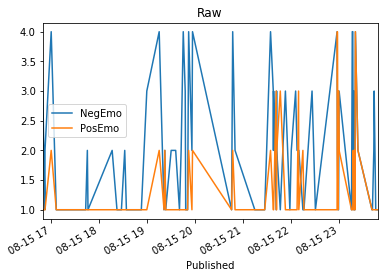

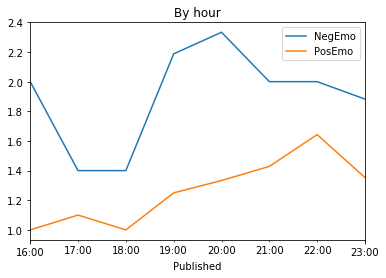

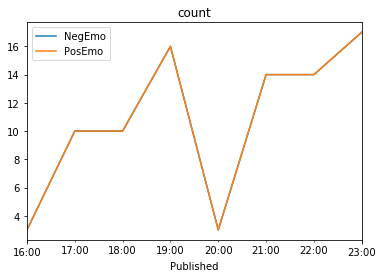

In [10]:
df_top_poster[['NegEmo', 'PosEmo']].plot(title='Raw')
df_top_poster[['NegEmo', 'PosEmo']].resample('1H').mean().plot(title='By hour') #Can resample time series to get hourly averages
df_top_poster[['NegEmo', 'PosEmo']].resample('1H').apply(len).plot(title='count') #Can resample time series to get hourly averages

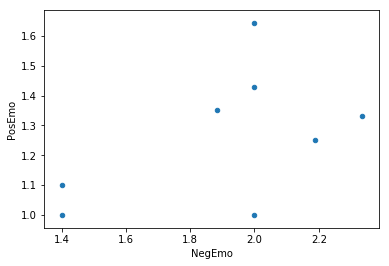

In [11]:
df_top_poster[['NegEmo', 'PosEmo']].resample('H').mean().plot.scatter('NegEmo', 'PosEmo')

In [12]:
df_top_poster[['NegEmo', 'PosEmo']].resample('H').mean().corr()

,NegEmo,PosEmo
NegEmo,1.000000,0.503337
PosEmo,0.503337,1.000000


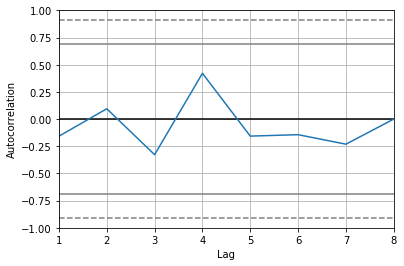

In [13]:
autocorrelation_plot(df_top_poster['Item'].resample('H').apply(len))

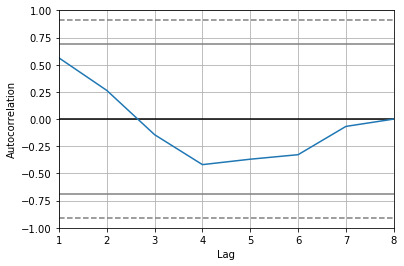

In [14]:
autocorrelation_plot(df_top_poster['PosEmo'].resample('H').mean())

## Average time series for all users

In [15]:
df_raw_plus_sent.index = pd.to_datetime(df_raw_plus_sent['Published']) #Index by date/time, converted to usable format

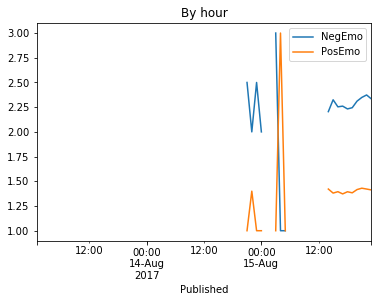

In [44]:
df_raw_plus_sent[['NegEmo', 'PosEmo']].resample('H').mean().plot(title='By hour')

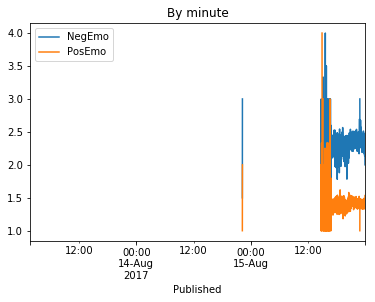

In [17]:
df_raw_plus_sent[['NegEmo', 'PosEmo']].resample('min').mean().plot(title='By minute')

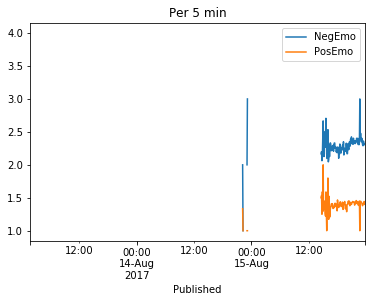

In [18]:
df_raw_plus_sent[['NegEmo', 'PosEmo']].resample('5min').mean().plot(title='Per 5 min')

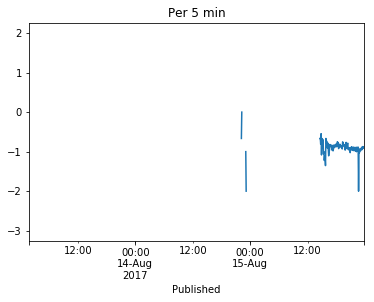

In [19]:
(df_raw_plus_sent['PosEmo'].resample('5min').mean() - df_raw_plus_sent['NegEmo'].resample('5min').mean()).plot(title='Per 5 min')

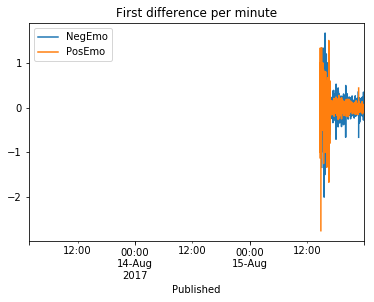

In [20]:
#First Difference
df_raw_plus_sent[['NegEmo', 'PosEmo']].resample('1min').mean().diff().plot(title = 'First difference per minute')

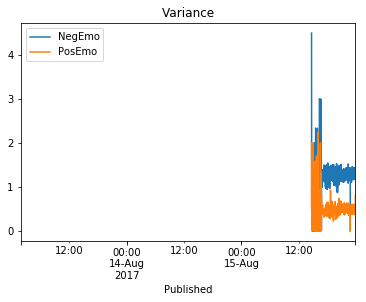

In [21]:
df_raw_plus_sent[['NegEmo', 'PosEmo']].resample('1min').var().plot(title = 'Variance')

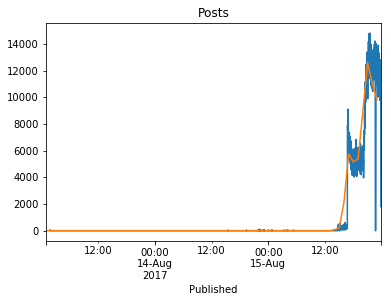

In [22]:
#Frequency of posts
(df_raw_plus_sent['Item'].resample('1min').apply(len)*60).plot(title = 'Posts') #Samples per minute
df_raw_plus_sent['Item'].resample('H').apply(len).plot(title = 'Posts') #Samples per hour (smoothed)

## Autocorrelation and lag embedding of post frequency

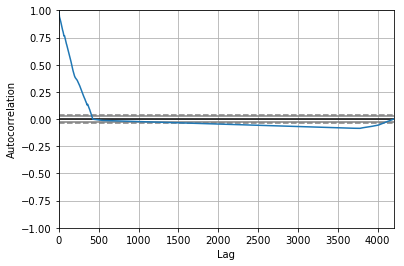

In [23]:
autocorrelation_plot(df_raw_plus_sent['Item'].resample('min').apply(len))

In [24]:
df_raw_plus_sent['Item'].resample('1min').apply(len).autocorr(560)

-0.022819498581551651

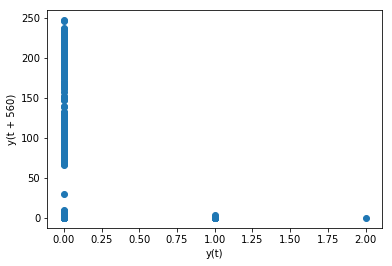

In [25]:
lag_plot(df_raw_plus_sent['Item'].resample('1min').apply(len), 560)

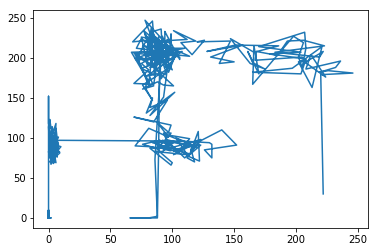

In [26]:
plt.plot(df_raw_plus_sent['Item'].resample('1min').apply(len).shift(152), df_raw_plus_sent['Item'].resample('1min').apply(len))

In [27]:
df_raw_plus_sent['Item'].resample('1min').apply(len).autocorr(515)

0.29813134082873505

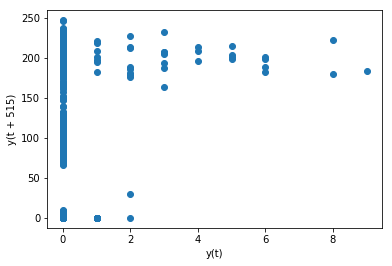

In [28]:
lag_plot(df_raw_plus_sent['Item'].resample('1min').apply(len), 515)

## Autocorrelation of sentiment

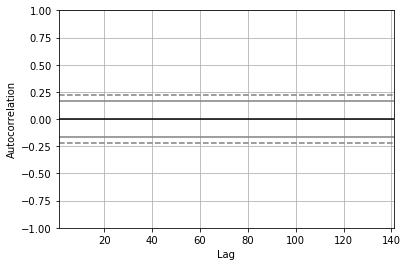

In [29]:
autocorrelation_plot(df_raw_plus_sent['PosEmo'].resample('30min').mean())

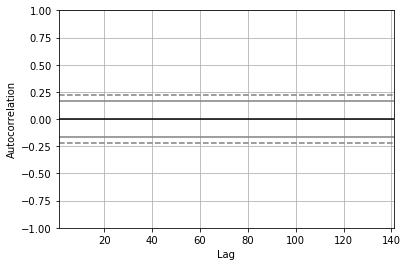

In [30]:
autocorrelation_plot(df_raw_plus_sent['NegEmo'].resample('30min').mean())

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

/home/hudson/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


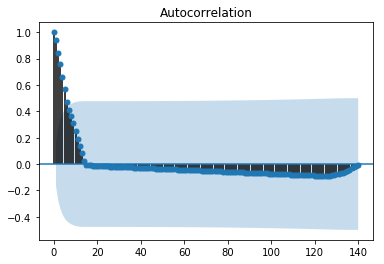

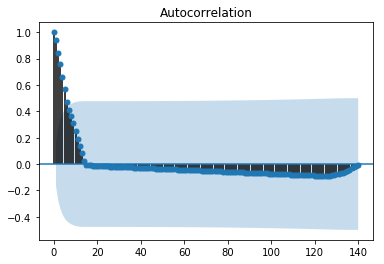

In [32]:
plot_acf(df_raw_plus_sent['Item'].resample('30min').apply(len))

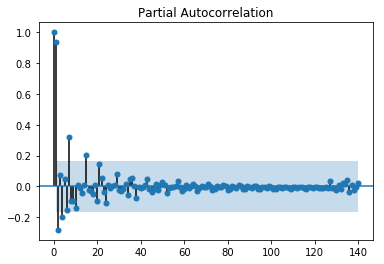

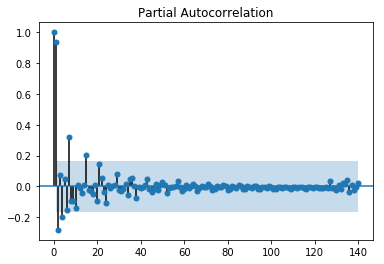

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_raw_plus_sent['Item'].resample('30min').apply(len))

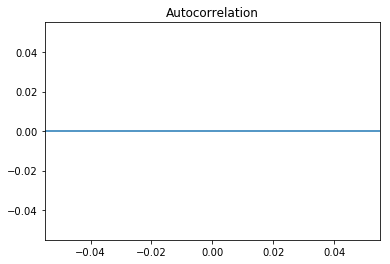

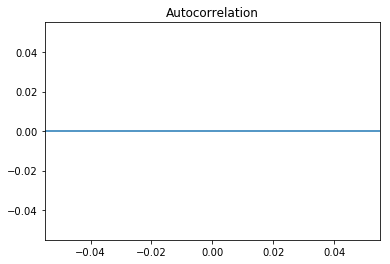

In [34]:
plot_acf(df_raw_plus_sent['NegEmo'].resample('30min').apply(np.mean))

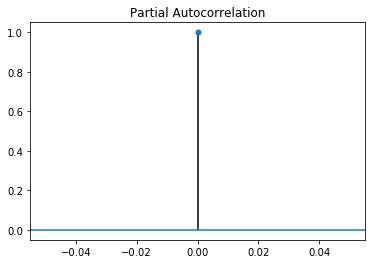

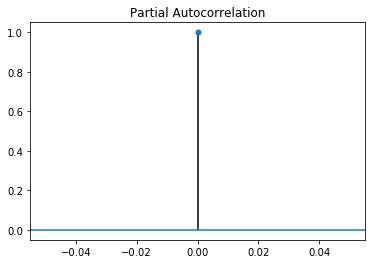

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf((df_raw_plus_sent['PosEmo'].resample('30min').mean() - df_raw_plus_sent['NegEmo'].resample('30min').mean()))

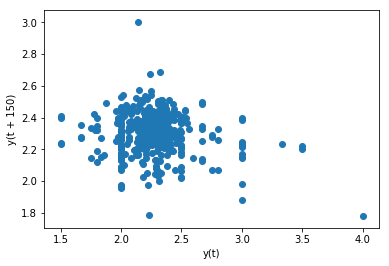

In [36]:
lag_plot(df_raw_plus_sent['NegEmo'].resample('1min').apply(np.mean), 5*30)

In [37]:
def recurrence(y):
    n = len(y)
    
    A = np.array([[maxnorm(y[i],y[j]) for j in range(n)] for i in range(n)])
    return(A)
    
def maxnorm(x,y):
    return(np.linalg.norm(np.array(x)-np.array(y), ord = np.inf))

In [38]:
A = recurrence(df_raw_plus_sent['NegEmo'].resample('1min').apply(np.mean).values.reshape(-1,1))

KeyboardInterrupt: 

In [ ]:
plt.imshow(A)

In [ ]:
plt.imshow((A>np.mean(A)))